In [56]:
import pandas as pd
import json
import time
import datetime
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose

https://stackoverflow.com/questions/36821994/slice-efficiently-pandas-datetime-index-by-a-specific-time
https://stackoverflow.com/questions/50492332/understanding-resampling-of-datetime-in-pandas
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rolling.html
https://stackoverflow.com/questions/41066688/python-pandas-calculating-average-price-within-15-minute-time-frame   
http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases
https://codeburst.io/dealing-with-datetimes-like-a-pro-in-pandas-b80d3d808a7f
https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/

In [57]:
# read in data from json
data = pd.read_json(r'C:\Users\murra667\Documents\Springboard\ultimate_challenge\logins.json')

In [58]:
# Convert that column into a datetime datatype
data['login_time'] = pd.to_datetime(data['login_time'])
# Set the datetime column as the index
data.index = data['login_time'] 
# create count column
data['num'] = 1

# The Big Picture

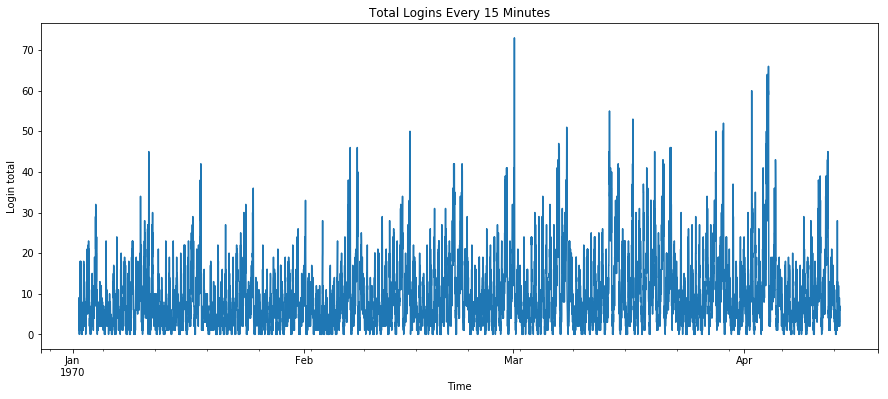

In [59]:
# get the counts of logins for 15 minute intervals in the data 
fifteen_min_group = data['login_time'].resample('15MIN').count()
# plot counts of logins for 15 minute periods
fifteen_min_group.plot(figsize=(15, 6))
plt.xlabel("Time")
plt.ylabel("Login total")
plt.title("Total Logins Every 15 Minutes")
plt.show()

Looking at the big picture of login total every fifteen minutes for four months captures what seem to be weekly oscillations in activity, such that login activity spikes at one point in the week and then goes back down. It is also obvious through this visualization that March and April see spikes in login activity, with some of the highest login amounts in a 15 minute window in the data. In order to better observe the daily patterns of fifteen minutes in the data, we look at the average counts for each 15 minute interval over the entire four-month period

# 15 Minute Window Averages

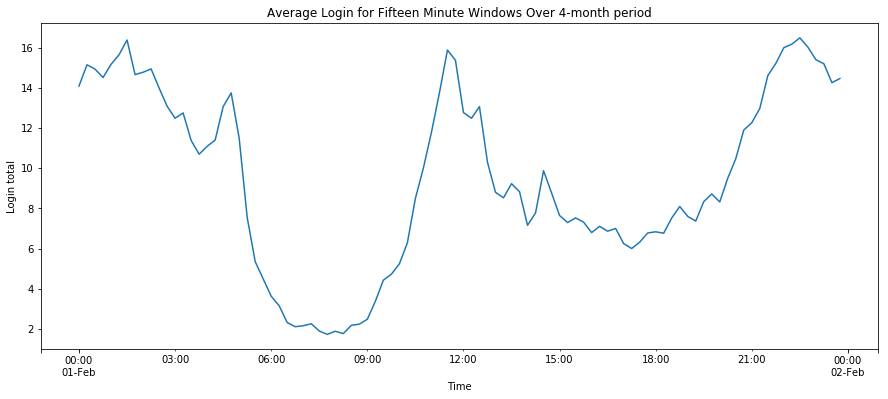

In [60]:
# groupby 15 minute intervals and reset index such that dataframe can be manipulated
fifteen_mins = data.groupby([pd.Grouper(key='login_time', freq='15T')])['num'].count().reset_index()
# separate out hour, minute and seconds from datetime
fifteen_mins[['h', 'm', 's']] = pd.DataFrame([(x.hour, x.minute, x.second) for x in fifteen_mins['login_time']])
# get the mean for each 15 minute period of a given day in the entire dataset
fifteen_mins_mean = fifteen_mins.groupby(["h", 'm']).mean().reset_index()
# re-join dataframe with datetime for ease in data viz
plot_fifteen_mins = fifteen_mins_mean.merge(fifteen_mins, on = ["h", "m"], how = 'outer' )
# subset dataframe to only include mean counts per 15 minutes and login time
plot_fifteen_mins = plot_fifteen_mins[['num_x', 'login_time']]
# transform plot_fifteen_mins into datetimeindex
plot_fifteen_mins['login_time'] = pd.to_datetime(plot_fifteen_mins['login_time'])
plot_fifteen_mins.index = plot_fifteen_mins['login_time'] 
# subset data so that it only includes fifteen minute intervals for one day (in this case day 1 of month 2 is selected
# but this nubmer is the same across any day in the four month period except those with missing data for certain time windows)
one_day_fifteen_mean = plot_fifteen_mins.loc[(plot_fifteen_mins.index.day == 1) & (plot_fifteen_mins.index.month == 2)]
# plot the average login count for each fifteen minute period over the four month dataset
one_day_fifteen_mean['num_x'].plot(figsize=(15, 6))
plt.xlabel("Time")
plt.ylabel("Login total")
plt.title("Average Login for Fifteen Minute Windows Over 4-month period")
plt.show()

The above plot shows the average activity for each 15 minute interval over the entire four-month dataset. Activity begins to increase around 21 hours and only beings to drop after 3 hours, where it remains near zero until rising again at 9 hours until 12. After 12, login activity once again drops, but not as low as between the 6-9 period. To see how these trends differ across months, a plot of the monthly average for each time window is plotted below. 

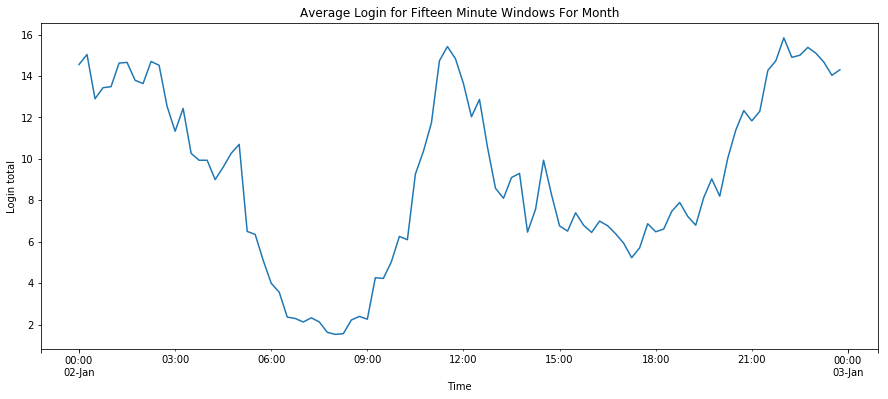

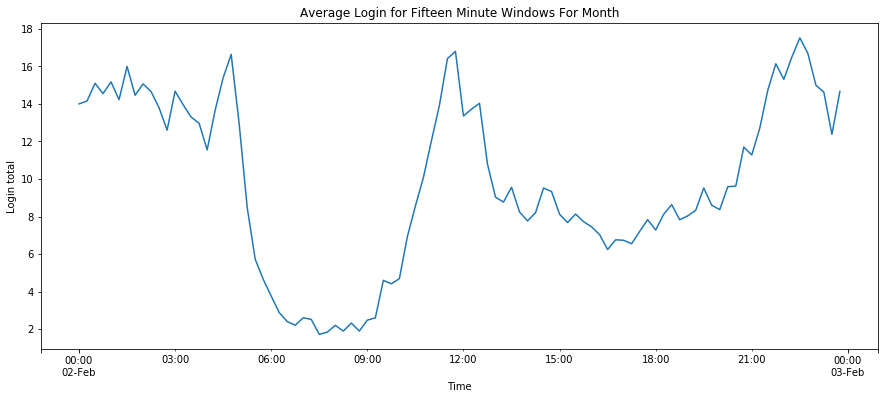

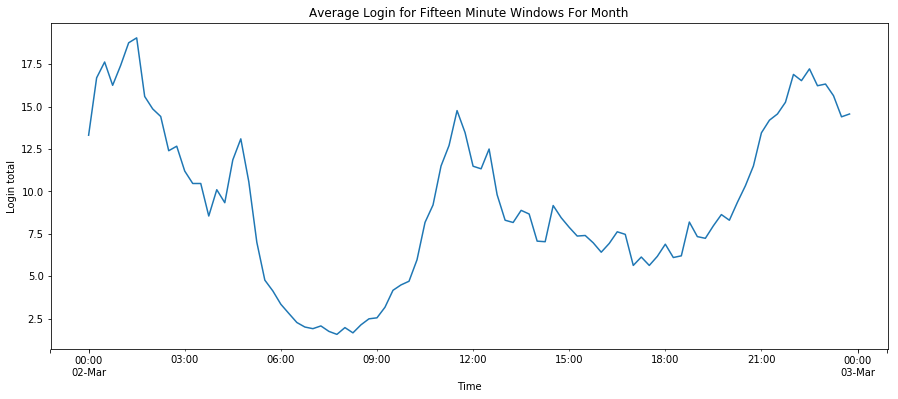

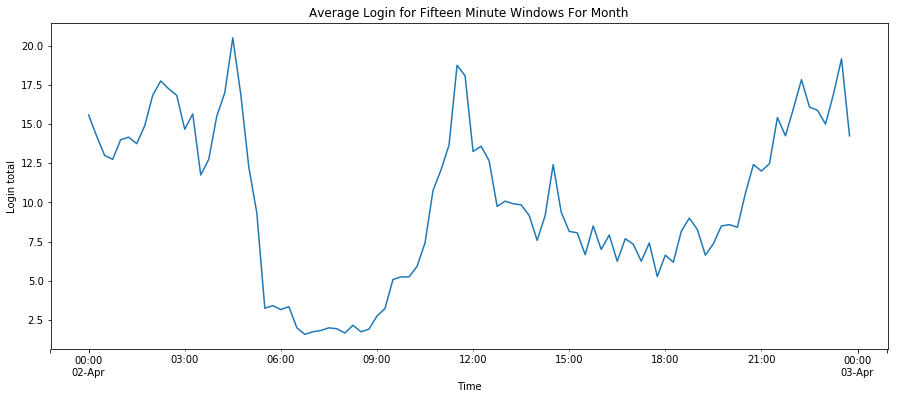

In [61]:
for i in range (1,5):
    fifteen_mins = data.groupby([pd.Grouper(key='login_time', freq='15T')])['num'].count().reset_index()
    fifteen_mins[['h', 'm', 's']] = pd.DataFrame([(x.hour, x.minute, x.second) for x in fifteen_mins['login_time']])
    plot_fifteen_mins.loc[(plot_fifteen_mins.index.day == 1) & (plot_fifteen_mins.index.month == 2)]
    fifteen_mins_mean = fifteen_mins.loc[(plot_fifteen_mins.index.month == i)].groupby(["h", 'm']).mean().reset_index()
    plot_fifteen_mins = fifteen_mins_mean.merge(fifteen_mins, on = ["h", "m"], how = 'outer' )
    plot_fifteen_mins = plot_fifteen_mins[['num_x', 'login_time']]
    plot_fifteen_mins['login_time'] = pd.to_datetime(plot_fifteen_mins['login_time'])
    plot_fifteen_mins.index = plot_fifteen_mins['login_time'] 
    one_day_fifteen_mean = plot_fifteen_mins.loc[(plot_fifteen_mins.index.day == 2) & (plot_fifteen_mins.index.month == i)]
    one_day_fifteen_mean['num_x'].plot(figsize=(15, 6))
    plt.xlabel("Time")
    plt.ylabel("Login total")
    plt.title("Average Login for Fifteen Minute Windows For Month")
    plt.show()

https://chrisalbon.com/python/data_wrangling/pandas_group_data_by_time/

https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-visualization-with-python-3

# Overall Trends in Logins As Seen By Weekly Average

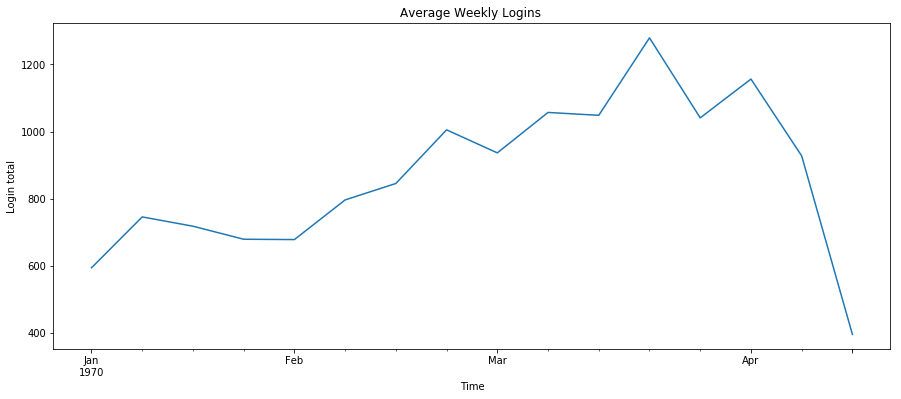

In [62]:
# get the daily count of logins 
weekly_count = data.groupby([pd.Grouper(key= 'login_time', freq='D')])['num'].count().reset_index()
# create month, day and year columns in dataset
weekly_count[['year', 'month', 'day']] = pd.DataFrame([(x.year, x.month, x.day) for x in weekly_count['login_time']])
# get the mean login count for each week in the dataset
weekly_mean = weekly_count.groupby([pd.Grouper(key='login_time', freq='W')])['num'].mean().reset_index()
# create datetime from weekly average 
weekly_mean['login_time'] = pd.to_datetime(weekly_mean['login_time'])
weekly_mean.index = weekly_mean['login_time']
# plot weekly average logins over dataset
weekly_mean['num'].plot(figsize = (15, 6))
plt.xlabel("Time")
plt.ylabel("Login total")
plt.title("Average Weekly Logins ")
plt.show()

As can be seen, there is an upward trend in the number of logins from March to April, as suggested by weekly mean values of login counts

In [64]:
data.to_csv("logins.csv")

In [65]:
data = pd.to_datetime(data['login_time'],  infer_datetime_format=True)

In [66]:
data.resample("15MIN")#.count()



DatetimeIndexResampler [freq=<15 * Minutes>, axis=0, closed=left, label=left, convention=start, base=0]

# Data Cleaning

In [68]:
df = pd.DataFrame(df_json)

In [70]:
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])
df['signup_date'] = pd.to_datetime(df['signup_date'])

In [71]:
df['retained'] = df.last_trip_date.dt.to_period('d') - df.signup_date.dt.to_period('d')

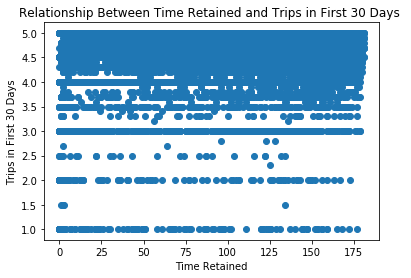

In [72]:
plt.scatter(df.retained, df.avg_rating_by_driver)
plt.xlabel("Time Retained")
plt.ylabel("Trips in First 30 Days")
plt.title("Relationship Between Time Retained and Trips in First 30 Days ")
plt.show()

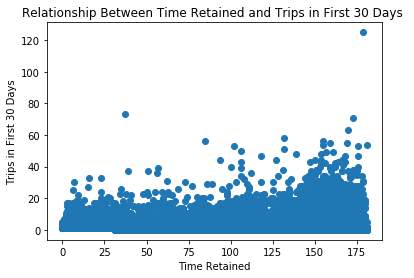

In [73]:
plt.scatter(df.retained, df.trips_in_first_30_days)
plt.xlabel("Time Retained")
plt.ylabel("Trips in First 30 Days")
plt.title("Relationship Between Time Retained and Trips in First 30 Days ")
plt.show()

In [75]:
df['retained'][df['retained'] < 30].count() 

12871

In [77]:
df['retained']

0        143
1         96
2          1
3        170
4         47
5        148
6          1
7          1
8         11
9          2
10       137
11         4
12        56
13       130
14         1
15         1
16       168
17       170
18       147
19       152
20        44
21       110
22        98
23       143
24       119
25         1
26         6
27        45
28       140
29        31
        ... 
49970     88
49971    153
49972    168
49973    178
49974     13
49975    158
49976    161
49977      3
49978    106
49979     73
49980     15
49981     49
49982     93
49983     30
49984      0
49985     30
49986    122
49987    124
49988    145
49989      7
49990    125
49991    172
49992      1
49993    179
49994    148
49995    131
49996      1
49997    111
49998      1
49999     92
Name: retained, Length: 50000, dtype: object

In [78]:
df['activity'] = df.last_trip_date.dt.to_period('M') - df.signup_date.dt.to_period('M')

In [79]:
df.loc[df['activity'] >= 6]

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,retained,activity
17,2.38,4.8,3.9,1.00,King's Landing,2014-07-01,iPhone,2014-01-12,0.0,0,True,95.2,170,6
87,3.06,4.7,5.0,1.00,Winterfell,2014-07-01,iPhone,2014-01-23,0.0,6,True,67.6,159,6
96,4.89,4.6,4.1,1.00,Winterfell,2014-07-01,iPhone,2014-01-26,1.9,11,True,76.9,156,6
147,5.44,4.6,3.7,1.09,Winterfell,2014-07-01,iPhone,2014-01-25,3.8,7,False,57.7,157,6
297,5.93,5.0,5.0,1.00,King's Landing,2014-07-01,iPhone,2014-01-16,0.0,1,False,100.0,166,6
305,7.50,4.8,4.0,1.01,King's Landing,2014-07-01,iPhone,2014-01-16,1.7,8,True,70.9,166,6
313,2.34,4.9,4.9,1.00,King's Landing,2014-07-01,Android,2014-01-11,0.0,0,True,23.1,171,6
350,2.00,4.8,5.0,1.00,King's Landing,2014-07-01,iPhone,2014-01-25,0.0,4,False,64.0,157,6
389,3.08,4.8,4.9,1.02,King's Landing,2014-07-01,None,2014-01-26,3.0,5,False,66.7,156,6
599,6.12,4.9,4.8,1.07,Winterfell,2014-07-01,iPhone,2014-01-06,14.3,11,False,77.1,176,6


# can look for statistical significance in proportion of black user who stay a certain amount of time
# plot the distribution of time variable or other variables

# Key points for modeling whether or not a user will be active on their 6 month

- take all users that took a trip after 6 months 
- Features
     - frequency of rides 
     - Android/Iphone users?
     - if they ride in surges or not
     - avg rating by driver
     - avg rating of driver 
         - could look at the average difference between these?
     - number of trips they took in the first 30 days (linear regression)
     - weekday percentage 
- not much training data, so could use a linear regression to look at variables as a function of time

# number of days since sign up as a correlation with the other variables 

In [81]:
df_json = json.load((open(r'C:\Users\murra667\Documents\Springboard\ultimate_challenge\ultimate_data_challenge.json')))

In [82]:
ultimate_data = pd.DataFrame(df_json)

In [83]:
ultimate_data.columns

Index(['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge',
       'city', 'last_trip_date', 'phone', 'signup_date', 'surge_pct',
       'trips_in_first_30_days', 'ultimate_black_user', 'weekday_pct'],
      dtype='object')

In [84]:
ultimate_data['retained'] = 0
ultimate_data['last_trip_date'] = pd.to_datetime(ultimate_data['last_trip_date'])
cutoff = ultimate_data['last_trip_date'].max() - pd.Timedelta(days = 30)
ultimate_data.loc[ultimate_data['last_trip_date'] >= cutoff, 'retained'] = 1
retained_count = len(ultimate_data.loc[ultimate_data['retained'] == 1])
not_retained_count = len(ultimate_data.loc[ultimate_data['retained'] == 0])
print ("Users Retained: {}\nUsers Not Retained: {}".format(retained_count, not_retained_count))

Users Retained: 18804
Users Not Retained: 31196


In [85]:
ultimate_data

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,retained
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,1
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,1
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,0
5,10.56,5.0,3.5,1.00,Winterfell,2014-06-06,iPhone,2014-01-09,0.0,2,True,100.0,1
6,3.95,4.0,NaN,1.00,Astapor,2014-01-25,Android,2014-01-24,0.0,1,False,100.0,0
7,2.04,5.0,5.0,1.00,Winterfell,2014-01-29,iPhone,2014-01-28,0.0,2,False,100.0,0
8,4.36,5.0,4.5,1.00,Winterfell,2014-02-01,Android,2014-01-21,0.0,2,False,100.0,0
9,2.37,5.0,NaN,1.00,Winterfell,2014-01-05,Android,2014-01-03,0.0,1,False,0.0,0


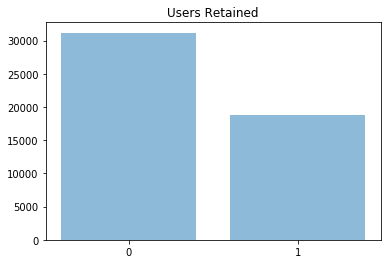

In [86]:
objects = ('Retained', 'Not Retained')
plt.bar(np.arange(len(objects)), ultimate_data['retained'].value_counts(), align='center', alpha=0.5)
plt.xticks(np.arange(len(objects)))
plt.ylabel('')
plt.title('Users Retained')
 
plt.show()

Above, I created labels in the dataset with the 'retained' column. I will build and train a machine learning model to accurately predict which users will or will not be retained. Value 0 in the 'retained' column indicates a user not active after the sixth month and Value 1, a user active after the sixth month. There is not such a great disparity between the number of users retained and not retained and for the scope of this exercise, it shouldn't be necessary to weight the labels. 

In [89]:
from statsmodels.stats.proportion import proportions_ztest
import numpy as np

In [90]:
ultimate_data.groupby('retained')['ultimate_black_user'].value_counts()

retained  ultimate_black_user
0         False                  21839
          True                    9357
1         True                    9497
          False                   9307
Name: ultimate_black_user, dtype: int64

It seems a reasonable assumption that whether or not a user takes an ultimate black - a special service - may say something about what kind of user they are, and whether or not they will stay longer. A difference of proportions z test is performed between the number of black users out of the retained users group and the number of black users out of the not-retained users group. 

#### Ho: There is no difference between the true proportion of retained users who use the black service and the true proportion of non-retained users who use the black service

#### Ha: The true proportion of retained users who use the black service is significantly larger than the true proportion of non-retained users who use the black service

#### Alpha = .05

In [91]:
from statsmodels.stats.proportion import proportions_ztest
import numpy as np
not_retained, retained = ultimate_data['retained'].value_counts()
ultimate_black_dict = dict(ultimate_data.groupby('retained')['ultimate_black_user'].value_counts())
black_not_retained = ultimate_black_dict[(0, True)]
black_retained = ultimate_black_dict[(1, True)]
# create numpy array of callbacks for retained and not retained black users
count = np.array([black_retained, black_not_retained])
# create a numpy array of total number of retained and not retained users
nobs = np.array([retained, not_retained])
# run proportions z test assuming null hypothesis is true, hence "larger" as argument for alternative
z, p = proportions_ztest(count, nobs, alternative = 'larger' )
print ("p-value {}".format(p))

p-value 0.0


A p-value of less than .05 indicates that the proportion of retained users who use black is significantly larger than the proportion of non-retained users who use black. This suggests whether or not a user takes a black as an important feature in a model that predicts retained and non-retained users

In [92]:
ultimate_data['last_trip_date'] = pd.to_datetime(ultimate_data['last_trip_date'])
ultimate_data['signup_date'] = pd.to_datetime(ultimate_data['signup_date'])


In [93]:
ultimate_data['user active after'] = [delta.days for delta in (ultimate_data['last_trip_date'] - ultimate_data['signup_date'])]

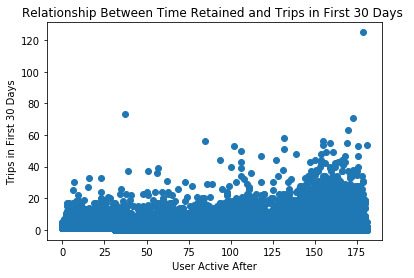

In [94]:
plt.scatter(ultimate_data['user active after'], ultimate_data.trips_in_first_30_days)
plt.xlabel("User Active After")
plt.ylabel("Trips in First 30 Days")
plt.title("Relationship Between Time Retained and Trips in First 30 Days ")
plt.show()

The number of trips that a user takes in the first 30 days of their membership may be an important feature in user-retention. It is not unreasonable to suspect that a heavy user in the first 30 days might stay on longer. In order to furtehr investigate this suspicion, the length of time a user stays was plotted alongside the number of trips a user took in the first 30 days. 

### Test the strength of the relationship between user retention time and number of trips a user took in the first 30 days

#### Ho: Variance in the distribution of the number of trips in the first 30 days can not be explained by the variance in the number of days a user was active

#### Ha: Variance in the distribution of the nubmer of trips in the first 30 days can be explained by the variance in the number of days a user was active

#### Alpha: .05

In [95]:
from scipy import stats

In [96]:
correlation, p = stats.pearsonr(ultimate_data['user active after'], ultimate_data.trips_in_first_30_days)
print ("Correlation Coefficient: {}\nP-value: {}".format(round(correlation, 2), round(p,2)))

Correlation Coefficient: 0.16
P-value: 0.0


Results of the pearson r test indicate to reject the null hypothesis at the .05 alpha level, suggesting the number of trips a user took in the first 30 days an important variable in predicting whether a user will be retained or not. This assumption should be approached with some caution, as there doesn't appear to be a linear relationship between many of the features in the data. 

### Training A Machine Learning Model

While at first it seemed desirable to construct a linear regression model to approximate the exact time in days that a user would be retained given the values for several other variables, it was decided to train a Random Forest model instead. This was due to the fact that the dataset contains many categorical variables of interest, and there were also some questions of non-linearity in realationships between features. 

### The Random Forest Model will be trained using 3 features:


#### Black User (ultimate_black_user)

As was described in EDA, there is a higher proportion of black users who were retained than not retained

#### Number of uses within the first 30 days (trips_in_first_30_days)

As was examined in EDA, there is a statistically significant correlation between the time a user stayed and the number of times they used the service in the first 30 days 

#### Average distance in miles taken within the first 30 days (avg_dist)

This variable should share a relationship with the number of uses within the first 30 days, but will be used in the model to see which feature is better at predicting user retention

#### Weekday Percentage (weekday_pct)

Intuitively, it seems that users who use the service during the week, especially 100 percent of the time, might be more long-term users than the user who uses the service ocasionally on a weekend night out 

### Relationship Between Average Distance and Trips Made in First 30 days

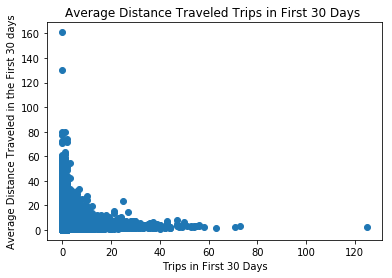

In [106]:
plt.scatter(ultimate_data['trips_in_first_30_days'], ultimate_data['avg_dist'])
plt.xlabel("Trips in First 30 Days")
plt.ylabel("Average Distance Traveled in the First 30 days")
plt.title("Average Distance Traveled Trips in First 30 Days ")
plt.show()

As is seen in figure above plotting the relationship between the number of trips taken in the first 30 days and the average distance traveled, there is a relationship between the two variables, though not linear, indicating that the variance in the residuals of one variable may be explained by the other. Nonetheless, they will both be included in the model. 

perhaps split the data since there seems to be this interesting relationship above


There does appear to be a 

In [98]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import sklearn


In [110]:
len(ultimate_data.loc[ultimate_data['retained'] == 1]), len(ultimate_data.loc[ultimate_data['retained'] == 0])

(18804, 31196)

In [120]:
ultimate_data_dummies = pd.get_dummies(ultimate_data, columns = ["city"])

In [121]:
ultimate_data_dummies

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,retained,user active after,city_Astapor,city_King's Landing,city_Winterfell
0,3.67,5.0,4.7,1.10,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,1,143,0,1,0
1,8.26,5.0,5.0,1.00,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,0,96,1,0,0
2,0.77,5.0,4.3,1.00,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,0,1,1,0,0
3,2.36,4.9,4.6,1.14,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,1,170,0,1,0
4,3.13,4.9,4.4,1.19,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,0,47,0,0,1
5,10.56,5.0,3.5,1.00,2014-06-06,iPhone,2014-01-09,0.0,2,True,100.0,1,148,0,0,1
6,3.95,4.0,NaN,1.00,2014-01-25,Android,2014-01-24,0.0,1,False,100.0,0,1,1,0,0
7,2.04,5.0,5.0,1.00,2014-01-29,iPhone,2014-01-28,0.0,2,False,100.0,0,1,0,0,1
8,4.36,5.0,4.5,1.00,2014-02-01,Android,2014-01-21,0.0,2,False,100.0,0,11,0,0,1
9,2.37,5.0,NaN,1.00,2014-01-05,Android,2014-01-03,0.0,1,False,0.0,0,2,0,0,1


In [126]:
# take the features that we want to use to train the forest
X = ultimate_data_dummies[["ultimate_black_user", "trips_in_first_30_days", "avg_dist", "weekday_pct", "city_Astapor", "city_King's Landing", "city_Winterfell"]]
# set the target dataset to train and convert column to array
y = ultimate_data_dummies[['retained']]

In [127]:
# split data set into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
# creat a gaussian classifier
clf = RandomForestClassifier(n_estimators = 100, class_weight='balanced')
# train the model using the training sets
clf.fit(X_train, y_train.values.ravel())
# predict the y values
all_features_pred = clf.predict(X_test)
all_features_pred_accu = metrics.accuracy_score(y_test, all_features_pred)
all_features_pred_rec = metrics.recall_score(y_test, all_features_pred)
all_features_pred_prec = metrics.precision_score(y_test, all_features_pred)
print("Accuracy:", all_features_pred_accu)
print ("Recall:",all_features_pred_rec)
print ("Precision:", all_features_pred_prec)
matrix = confusion_matrix(y_test, all_features_pred)
print (matrix)

Accuracy: 0.7022
Recall: 0.6090345438441098
Precision: 0.6033696033696033
[[7095 2260]
 [2207 3438]]


In [128]:
feature_imp = pd.Series(clf.feature_importances_,index = X.columns).sort_values(ascending = False)
feature_imp

avg_dist                  0.536223
weekday_pct               0.259848
trips_in_first_30_days    0.095190
city_King's Landing       0.051221
ultimate_black_user       0.034134
city_Astapor              0.014327
city_Winterfell           0.009055
dtype: float64

Contrary to the importance assumed of the ultimate_black_user variable, the most important feature in the model is actually the average distance that a user traveled in the first 30 days. 

The model accuracy is fairly high, and recall and precision scores suggest that it is generalizable to other datasets. 


### Because avg_dist and weekday_pct seem to be important factors in predicting whether a user stays past the 6-month mark, it may be useful to do some feature engineering with these two features. 

In [151]:
retained_avg_dist = ultimate_data.loc[ultimate_data['retained'] == 1]['avg_dist']
retained_weekday_pct = ultimate_data.loc[ultimate_data['retained'] == 1]['weekday_pct']

In [152]:
nretained_avg_dist = ultimate_data.loc[ultimate_data['retained'] == 0]['avg_dist']
nretained_weekday_pct = ultimate_data.loc[ultimate_data['retained'] == 0]['weekday_pct']

In [153]:
print ("Avg Distance\nRetained: {} vs Not Retained {}".format(retained_avg_dist_mean, nretained_avg_dist_mean))

Avg Distance
Retained: 5.114788342905812 vs Not Retained 6.207938517758687


In [154]:
print ("Weekday Pct\nRetained: {} vs Not Retained {}".format(retained_weekday_pct_mean, nretained_weekday_pct_mean))

Weekday Pct
Retained: 61.3890342480323 vs Not Retained 60.64703167072686


In [155]:
from scipy import stats

### Difference of Weekday Pct Mean Between Retained and Non-Retained Riders

Ho: There is a significant difference in the mean avg distance traveled in the first 30 days of a users account between retained and non-retained users
    
Ha: There is a significant difference in the mean avg distance traveled in the first 30 days of a users account between retained and non-retained users

alpha = .05

In [159]:
s, p = stats.mannwhitneyu(nretained_avg_dist, nretained_weekday_pct, alternative = "two-sided")
("P- value: {}".format(p))

'P- value: 0.0'

### Difference of Avg Distance Mean Between Retained and Non-Retained Riders

Ho: There is a significant difference in the mean weekday pct traveled of a users account between retained and non-retained users
    
Ha: There is a significant difference in the mean weekday pct traveled of a users account between retained and non-retained users

alpha = .05

In [160]:
s, p = stats.mannwhitneyu(retained_avg_dist, nretained_avg_dist, alternative = "two-sided")
("P- value: {}".format(p))

'P- value: 1.0105756877386522e-14'

Whitney tests conducted on the distributions of both average distance traveled in the first 30 days and the weekday pct traveled indicate significant differences between retained and non-retained users. Actionable insights for Ultimate Inc. should focus on these two variables in the data.  


### Location seems to be somewhat important in the model. 

In [130]:
ultimate_data.loc[ultimate_data['retained'] == 0]['city'].value_counts()

Winterfell        15123
Astapor           12306
King's Landing     3767
Name: city, dtype: int64

In [131]:
ultimate_data.loc[ultimate_data['retained'] == 1]['city'].value_counts()

Winterfell        8213
King's Landing    6363
Astapor           4228
Name: city, dtype: int64

A suggestion might be to do more targeted marketing to users City of King's Landing. Or, promotionals could be offered to residents of Astapor.

### Future Analytics

Future analytics might look at a rider's activity across the current variables (or others) to see if there is a difference in the way that a retained user vs. non-retained user behaves month to month in the six month period. This can be achieved through time models. 